In [4]:
import essentia.standard
from pylab import imshow, show
import matplotlib.pyplot as plt


mono_loader = essentia.standard.MonoLoader(filename = 'vitosha_short.mp3', sampleRate = 44100)
audio_samples = mono_loader()

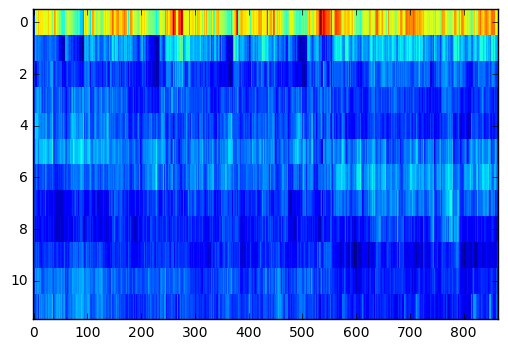

In [5]:
######### frame-level MFCCs extractor

### init
from essentia.standard import *
window = Windowing(type = 'hann')
spectrum = Spectrum() 
mfcc = MFCC()

### loop in audio
mfccs = []

frame_size = 1024
hop_size = 512
for audio_frame in FrameGenerator(audio_samples, frameSize = frame_size, hopSize = hop_size):
    window_current = window(audio_frame)
    spec_current = spectrum(window_current)
    mfcc_bands, mfcc_coeffs = mfcc(spec_current)
    mfccs.append(mfcc_coeffs)


mfccs = essentia.array(mfccs).T

# and plot
imshow(mfccs[1:,:], aspect = 'auto', interpolation='none')
show() 




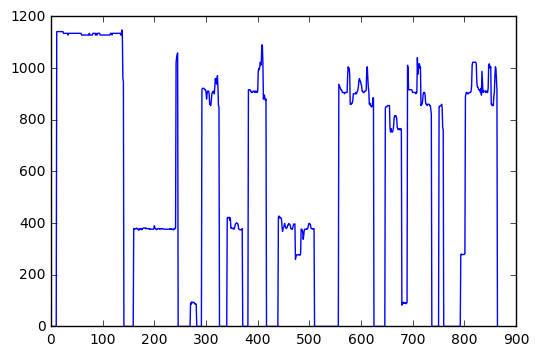

In [6]:
## predominant melody extraction 
from essentia.standard import PredominantPitchMelodia

pitchTracker = PredominantPitchMelodia(frameSize = frame_size, hopSize = hop_size, 
        voicingTolerance = 1.4,  guessUnvoiced=True)

pitch, pitchConf = pitchTracker(audio_samples)
plt.plot(pitch)
show()